# INVESTIGATING THE DATA

In [1]:
import pandas as pd

data_species = pd.read_csv('species_info.csv')
data_obs = pd.read_csv('observations.csv')

data_species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [2]:
data_obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [3]:
# checking uniques category of species
print(data_species.category.unique())
print(data_species.scientific_name.nunique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
5541


In [4]:
# unique park names
print(data_obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


### Checking and Removing all duplicated scientific names...

In [5]:
data3 = data_species[data_species.scientific_name == 'Castor canadensis']
print(data3)

print(len(data3.scientific_name))

print()
print(data3.iloc[0,1])

     category    scientific_name             common_names conservation_status
49     Mammal  Castor canadensis  American Beaver, Beaver                 NaN
3050   Mammal  Castor canadensis          American Beaver                 NaN
4475   Mammal  Castor canadensis                   Beaver                 NaN
3

Castor canadensis


In [6]:
list1 = []
for data in data_species.scientific_name.unique():
    data4 = data_species[data_species.scientific_name == data]
    if len(data4.scientific_name) > 1:
        list1.append(data4.iloc[0,1])

In [7]:
data_species = data_species.set_index('scientific_name')
new_species_data = data_species.drop(list1, axis=0)

In [8]:
new_species_data = new_species_data.reset_index()

In [9]:
new_species_data

,scientific_name,category,common_names,conservation_status
0,Clethrionomys gapperi gapperi,Mammal,Gapper's Red-Backed Vole,NaN
1,Bos bison,Mammal,"American Bison, Bison",NaN
2,Bos taurus,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Ovis aries,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Canis latrans,Mammal,Coyote,Species of Concern
...,...,...,...,...
5262,Solanum parishii,Vascular Plant,Parish's Nightshade,NaN
5263,Solanum xanti,Vascular Plant,"Chaparral Nightshade, Purple Nightshade",NaN
5264,Parthenocissus vitacea,Vascular Plant,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5265,Vitis californica,Vascular Plant,"California Grape, California Wild Grape",NaN


In [10]:
new_species_data.scientific_name.duplicated().sum()

0

In [11]:
# Replacing all Nan values with No status
new_species_data = new_species_data.fillna('No status')
new_species_data

,scientific_name,category,common_names,conservation_status
0,Clethrionomys gapperi gapperi,Mammal,Gapper's Red-Backed Vole,No status
1,Bos bison,Mammal,"American Bison, Bison",No status
2,Bos taurus,Mammal,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No status
3,Ovis aries,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No status
4,Canis latrans,Mammal,Coyote,Species of Concern
...,...,...,...,...
5262,Solanum parishii,Vascular Plant,Parish's Nightshade,No status
5263,Solanum xanti,Vascular Plant,"Chaparral Nightshade, Purple Nightshade",No status
5264,Parthenocissus vitacea,Vascular Plant,"Thicket Creeper, Virginia Creeper, Woodbine",No status
5265,Vitis californica,Vascular Plant,"California Grape, California Wild Grape",No status


### Distribution of the conservation status

In [12]:
new_species_data.conservation_status.value_counts(normalize=True).reset_index()

,index,conservation_status
0,No status,0.968103
1,Species of Concern,0.026960
2,Endangered,0.002658
3,Threatened,0.001709
4,In Recovery,0.000570


### Checking for species more likely to be endangered

In [13]:
df = pd.crosstab(new_species_data.category, new_species_data.conservation_status)
df

conservation_status,Endangered,In Recovery,No status,Species of Concern,Threatened
category,,,,,
Amphibian,1,0,71,4,2
Bird,4,3,386,64,0
Fish,3,0,113,4,3
Mammal,5,0,119,17,2
Nonvascular Plant,0,0,328,5,0
Reptile,0,0,72,5,0
Vascular Plant,1,0,4010,43,2


### Visualizing species and their conservation status

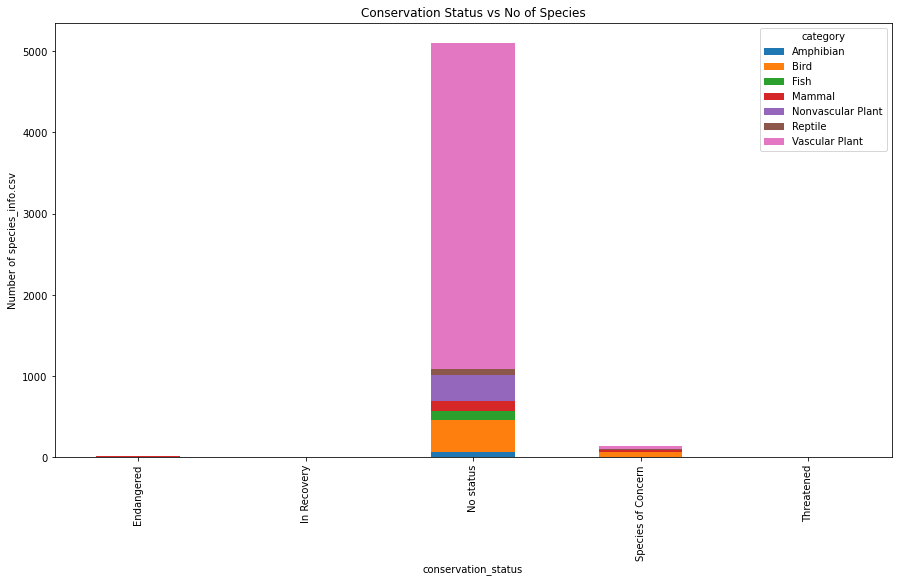

In [14]:
df2 = pd.crosstab(new_species_data.conservation_status, new_species_data.category)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Conservation Status vs No of Species')
plt.ylabel('Number of species_info.csv')
plt.show()

### Checking for association between a species and its conservation status:

In [15]:
from scipy.stats import chi2_contingency

chi2, pval, dof, expected = chi2_contingency(df)
print("Chi-Value", chi2)
print("P_Value:", pval,'\n')
expected = pd.DataFrame(expected, index=df.index, columns=df.columns)
expected

Chi-Value 531.7773681806135
P_Value: 4.119369512134023e-97 



conservation_status,Endangered,In Recovery,No status,Species of Concern,Threatened
category,,,,,
Amphibian,0.207329,0.044428,75.512056,2.102905,0.133283
Bird,1.214733,0.260300,442.423201,12.320866,0.780900
Fish,0.326941,0.070059,119.076704,3.316119,0.210177
Mammal,0.380103,0.081451,138.438770,3.855326,0.244352
Nonvascular Plant,0.885134,0.189672,322.378394,8.977786,0.569015
Reptile,0.204671,0.043858,74.543953,2.075945,0.131574
Vascular Plant,10.781090,2.310234,3926.626922,109.351054,6.930701


In [16]:
data_obs = data_obs.drop_duplicates()
data_obs.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [17]:
data_obs_great_smoky = data_obs[data_obs.park_name == 'Great Smoky Mountains National Park']
data_obs_yosemite = data_obs[data_obs.park_name == 'Yosemite National Park']
data_obs_bryce = data_obs[data_obs.park_name == 'Bryce National Park']
data_obs_yellowstone = data_obs[data_obs.park_name == 'Yellowstone National Park']

In [18]:
data_obs_great_smoky

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
4,Githopsis specularioides,Great Smoky Mountains National Park,85
7,Elymus multisetus,Great Smoky Mountains National Park,39
14,Fabronia ciliaris,Great Smoky Mountains National Park,72
...,...,...,...
23274,Atriplex subspicata,Great Smoky Mountains National Park,69
23282,Thalictrum alpinum,Great Smoky Mountains National Park,65
23283,Carex filifolia,Great Smoky Mountains National Park,30
23285,Spiza americana,Great Smoky Mountains National Park,84


In [19]:
def drop(park):
    list1 = []
    for data in park.scientific_name.unique():
        data4 = park[park.scientific_name == data]
        if len(data4.scientific_name) > 1:
            list1.append(data4.iloc[0,0])        
    print(len(list1))
    park = park.set_index('scientific_name')
    park = park.drop(list1, axis=0)
    park = park.reset_index()
    return park

In [20]:
drop(data_obs_great_smoky)

268


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Githopsis specularioides,Great Smoky Mountains National Park,85
3,Elymus multisetus,Great Smoky Mountains National Park,39
4,Fabronia ciliaris,Great Smoky Mountains National Park,72
...,...,...,...
5268,Atriplex subspicata,Great Smoky Mountains National Park,69
5269,Thalictrum alpinum,Great Smoky Mountains National Park,65
5270,Carex filifolia,Great Smoky Mountains National Park,30
5271,Spiza americana,Great Smoky Mountains National Park,84


In [21]:
drop(data_obs_bryce)

273


,scientific_name,park_name,observations
0,Abutilon theophrasti,Bryce National Park,84
1,Ludwigia peploides ssp. glabrescens,Bryce National Park,103
2,Cistothorus platensis,Bryce National Park,114
3,Setaria viridis var. viridis,Bryce National Park,101
4,Carduus nutans,Bryce National Park,83
...,...,...,...
5263,Cinna bolanderi,Bryce National Park,117
5264,Carduus pycnocephalus,Bryce National Park,54
5265,Symphyotrichum frondosum,Bryce National Park,101
5266,Otospermophilus beecheyi,Bryce National Park,130


In [22]:
drop(data_obs_yellowstone)

270


,scientific_name,park_name,observations
0,Spizella pusilla,Yellowstone National Park,228
1,Diphyscium cumberlandianum,Yellowstone National Park,250
2,Arabis davidsonii,Yellowstone National Park,279
3,Viola glabella,Yellowstone National Park,261
4,Festuca idahoensis,Yellowstone National Park,239
...,...,...,...
5266,Torilis nodosa,Yellowstone National Park,231
5267,Schistidium apocarpum,Yellowstone National Park,263
5268,Sasa palmata,Yellowstone National Park,210
5269,Potentilla flabellifolia,Yellowstone National Park,246


In [23]:
drop(data_obs_yosemite)

271


,scientific_name,park_name,observations
0,Prunus subcordata,Yosemite National Park,138
1,Elymus virginicus var. virginicus,Yosemite National Park,112
2,Lysimachia quadrifolia,Yosemite National Park,168
3,Quercus bicolor,Yosemite National Park,143
4,Muhlenbergia rigens,Yosemite National Park,165
...,...,...,...
5265,Amaranthus californicus,Yosemite National Park,108
5266,Carex crebriflora,Yosemite National Park,181
5267,Croton monanthogynus,Yosemite National Park,173
5268,Dicranella rufescens,Yosemite National Park,171
